# Shubham Sharma
## IIT BOMBAY


This code will explain the behaviour of how denoising autoencoder behaves. The dataset that we are working on is MNIST hand written digits. The first block is for the working of tensorboard for generating the logs for visualization purpose.

In [0]:
# For tensorflow


# !pip install -q tf-nightly-2.0-preview

#Load the tensorboard extension
%load_ext tensorboard

#Clear any logs from previous runs
!rm -rf ./logs/

In [2]:
#UPLOADING THE IMPORTANT PACKAGES
%matplotlib inline
#setting things up:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
#Importing noise
from keras.layers import GaussianNoise
import datetime


Using TensorFlow backend.


In [0]:
#DATA LOADING AND VISUALIZATION
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) /255
x_test = x_test.reshape(10000, 784) /255

We'll add gaussian noise to our input image of the hand written digits and then train our autoencoder in such a way that it try to generates clear image. We have done this so in future it see some noisy data then the autoencoder will try to regenrate it.



In [0]:
# Generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [5]:
#Autoencoder
m = Sequential()
#m.add(GaussianNoise(1.2, input_shape=(784,)))
m.add(Dense(512,  activation='linear', input_shape=(784,)))
m.add(Dense(128,  activation='linear'))
m.add(Dense(50,    activation='linear', name="bottleneck"))
m.add(Dense(128,  activation='linear'))
m.add(Dense(512,  activation='linear'))
m.add(Dense(784,  activation='linear'))
m.compile(loss='mean_squared_error', optimizer = Adam(),metrics=['accuracy'])


log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)


epochs=200
batch_size=128
## tensorBaord


W0704 09:24:40.912900 140249050277760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 09:24:40.936130 140249050277760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 09:24:40.938903 140249050277760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 09:24:41.078778 140249050277760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
history = m.fit(x_train_noisy, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test_noisy, x_test),callbacks= [tensorboard_callback])
Reconstruction = m.predict(x_test)        # reconstruction


W0704 09:24:42.918735 140249050277760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0704 09:24:43.410719 140249050277760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 60000 samples, validate on 10000 samples


W0704 09:24:44.959340 140249050277760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0704 09:24:44.961122 140249050277760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/200
60000/60000 [==============================] - 5s 80us/step - loss: 0.0540 - acc: 0.0100 - val_loss: 0.0334 - val_acc: 0.0107
Epoch 2/200
60000/60000 [==============================] - 4s 65us/step - loss: 0.0317 - acc: 0.0112 - val_loss: 0.0299 - val_acc: 0.0092
Epoch 3/200
60000/60000 [==============================] - 4s 62us/step - loss: 0.0297 - acc: 0.0117 - val_loss: 0.0289 - val_acc: 0.0100
Epoch 4/200
60000/60000 [==============================] - 4s 66us/step - loss: 0.0289 - acc: 0.0116 - val_loss: 0.0282 - val_acc: 0.0115
Epoch 5/200
60000/60000 [==============================] - 4s 68us/step - loss: 0.0285 - acc: 0.0121 - val_loss: 0.0280 - val_acc: 0.0112
Epoch 6/200
60000/60000 [==============================] - 4s 64us/step - loss: 0.0284 - acc: 0.0114 - val_loss: 0.0278 - val_acc: 0.0113
Epoch 7/200
60000/60000 [==============================] - 3s 58us/step - loss: 0.0282 - acc: 0.0119 - val_loss: 0.0279 - val_acc: 0.0099
Epoch 8/200
60000/60000 [=========

In [7]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


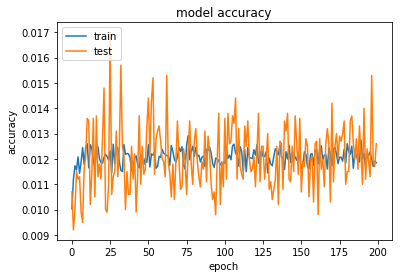

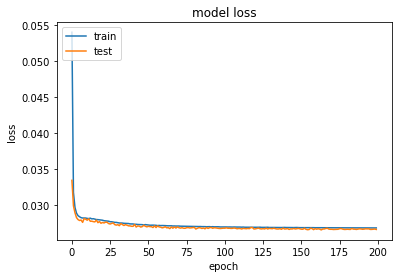

In [8]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

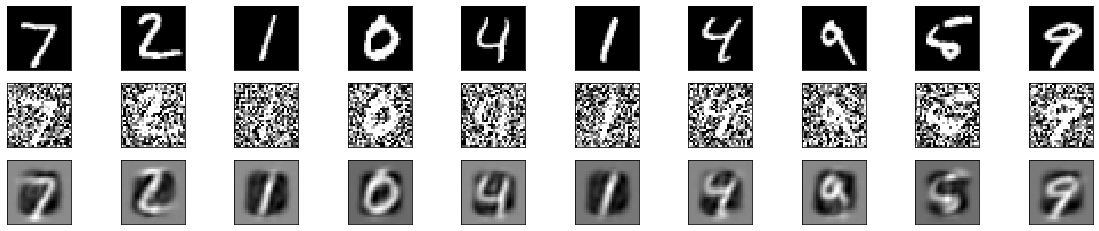

In [9]:

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28 ))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i +n+ 1)
    plt.imshow(x_test_noisy[i].reshape(28,28 ))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(Reconstruction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
